# DATASET

In [1]:
import pandas as pd
Reviews = pd.read_csv('IMDB Dataset.csv')

In [2]:
Reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
Reviews.shape

(50000, 2)

In [4]:
Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
Reviews.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
for i in range(4):
    print("REVIEW:", i)
    print(Reviews['review'].iloc[i])
    if(Reviews['sentiment'].iloc[i] == 'positive'):
        print('👍🏽')
    else:
        print('👎🏽')
    print('\n')

REVIEW: 0
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due 

## Checking for MISSING VALUES

In [7]:
Reviews.isna().sum()

review       0
sentiment    0
dtype: int64

## Checking if data is BALANCED or UNBALANCED

In [8]:
Reviews['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Text(0.5, 1.0, 'Sentiment Distribution')

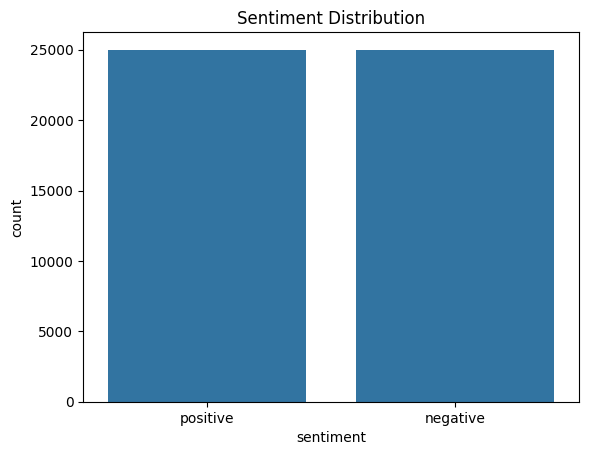

In [9]:
import seaborn as sns
sns.countplot(x='sentiment', data=Reviews)
              
import matplotlib.pyplot as plt
plt.title('Sentiment Distribution')

## WORD COUNT for the reviews

In [10]:
def no_of_words(text):
    words = text.split()
    return len(words)

In [11]:
# apply() is a pandas method that applies a function along an axis of the DataFrame or to specific columns/rows
Reviews['Word Count'] = Reviews['review'].apply(no_of_words)

In [12]:
Reviews

,review,sentiment,Word Count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230
...,...,...,...
49995,I thought this movie did a down right good job...,positive,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112
49997,I am a Catholic taught in parochial elementary...,negative,230
49998,I'm going to have to disagree with the previou...,negative,212


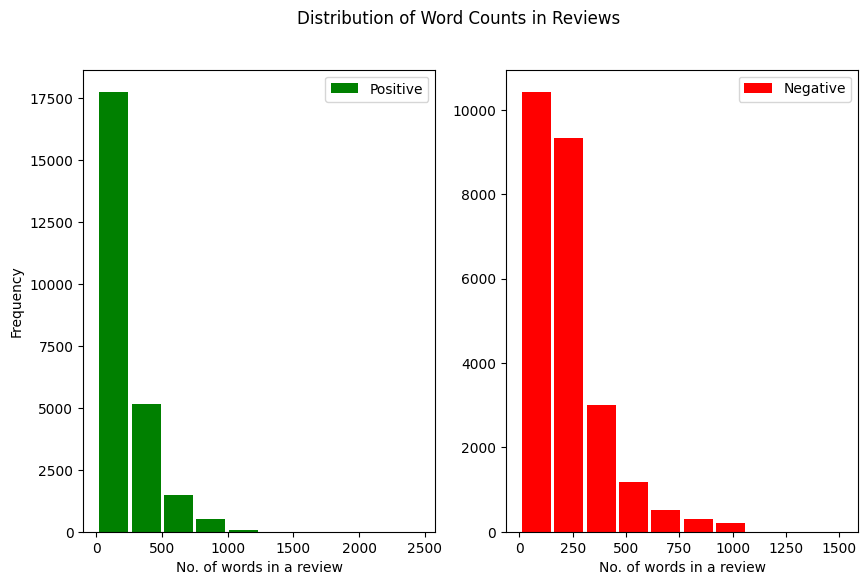

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# df[df['sentiment'] == 'positive']['word count']: Filters the DataFrame to get the 'word count' values where sentiment is 'positive', 
# then plots a histogram of these values.
ax[0].hist(Reviews[Reviews['sentiment'] == 'positive']['Word Count'], label = 'Positive', color = 'green', rwidth = 0.9)
ax[0].legend(loc = 'upper right')
ax[0].set_xlabel('No. of words in a review')
ax[0].set_ylabel('Frequency')

ax[1].hist(Reviews[Reviews['sentiment'] == 'negative']['Word Count'], label = 'Negative', color = 'red', rwidth = 0.9)
ax[1].legend(loc = 'upper right')
ax[1].set_xlabel('No. of words in a review')

fig.suptitle('Distribution of Word Counts in Reviews')
plt.show();

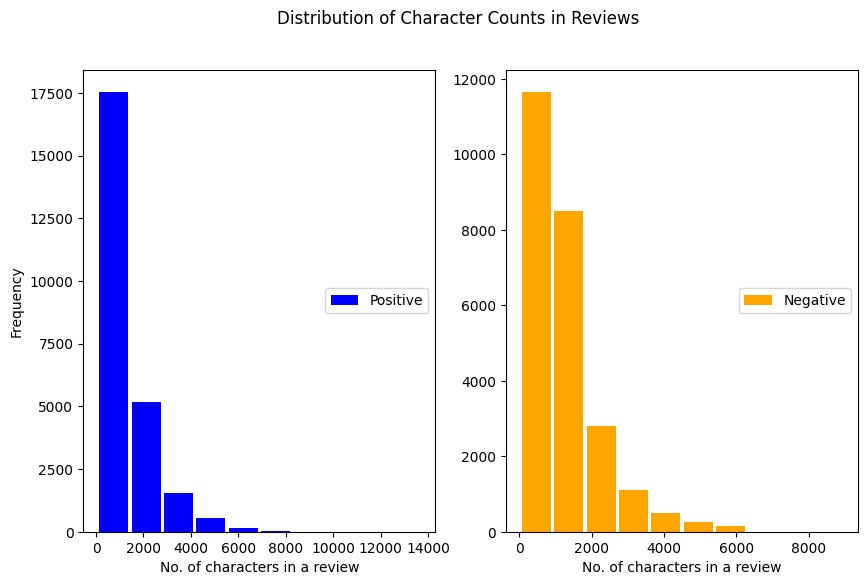

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# df[df['sentiment'] == 'positive']['word count']: Filters the DataFrame to get the 'word count' values where sentiment is 'positive', 
# then plots a histogram of these values.
ax[0].hist(Reviews[Reviews['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9)
ax[0].legend(loc = 'right')
ax[0].set_xlabel('No. of characters in a review')
ax[0].set_ylabel('Frequency')

ax[1].hist(Reviews[Reviews['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='orange', rwidth=0.9)
ax[1].legend(loc = 'right')
ax[1].set_xlabel('No. of characters in a review')

fig.suptitle('Distribution of Character Counts in Reviews')
plt.show();

## CONVERTING Target Column to Numerical Format

In [15]:
# Chained Assignment: May lead to unexpected behavior due to the way Pandas handles intermediate objects(Reviews.sentiment)
# Reviews.sentiment.replace('positive', 1, inplace=True)
# Reviews.sentiment.replace('negative', 0,inplace=True)

Reviews.replace({'sentiment': {'positive': 1, 'negative': 0}}, inplace=True)

C:\Users\Rathi\AppData\Local\Temp\ipykernel_8796\1251883618.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Reviews.replace({'sentiment': {'positive': 1, 'negative': 0}}, inplace=True)


In [16]:
Reviews

,review,sentiment,Word Count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230
...,...,...,...
49995,I thought this movie did a down right good job...,1,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,112
49997,I am a Catholic taught in parochial elementary...,0,230
49998,I'm going to have to disagree with the previou...,0,212


# PREPROCESSING text data

In [17]:
import re
import nltk

from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Using a set for membership checking provides O(1) average-TC, while using a list typically results in O(n)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [19]:
def data_processing(text):
    text = text.lower()

    # substitutes occurrences of <br /> with an empty string in the text variable
    text = re.sub('<br />', '', text)

    # Remove URLs starting with http, https, or www followed by any non-whitespace characters (\S+)
    # re.MULTILINE allows to match URLs that appear at the beginning of any line in a multi-line string, not just at the beginning of the entire string
    text = re.sub(r'https\S+|http\S+|www\S+', '', text, flags=re.MULTILINE)

    # Remove '@' followed by one or more word characters, alphanumeric characters and underscores, (\w+) or '#' from text
    text = re.sub(r'\@w+|\#', '', text)

    # Remove all non-alphanumeric characters except whitespace from the text
    text = re.sub(r'[^\w\s]', '', text)

    text_tokens = word_tokenize(text)

    # List comprehensions provide a concise way to create lists.
    # When you want to transform or filter elements from an iterable (like lists, tuples, or strings) and collect the results into a new list
    filtered_text = [w for w in text_tokens if not w in stop_words]

    return ' '.join(filtered_text)

In [20]:
Reviews.review = Reviews['review'].apply(data_processing)

In [21]:
Reviews

,review,sentiment,Word Count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,0,138
4,petter matteis love time money visually stunni...,1,230
...,...,...,...
49995,thought movie right good job wasnt creative or...,1,194
49996,bad plot bad dialogue bad acting idiotic direc...,0,112
49997,catholic taught parochial elementary schools n...,0,230
49998,im going disagree previous comment side maltin...,0,212


In [22]:
Reviews['Word Count'] = Reviews['review'].apply(no_of_words)
Reviews

,review,sentiment,Word Count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125
...,...,...,...
49995,thought movie right good job wasnt creative or...,1,85
49996,bad plot bad dialogue bad acting idiotic direc...,0,55
49997,catholic taught parochial elementary schools n...,0,115
49998,im going disagree previous comment side maltin...,0,115


## Removing DUPLICATE Entries

In [23]:
Reviews.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [24]:
duplicated_count = Reviews.duplicated().sum()
print('No. of duplicate entries: ', duplicated_count)

No. of duplicate entries:  422


In [25]:
Reviews.drop_duplicates()

,review,sentiment,Word Count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125
...,...,...,...
49995,thought movie right good job wasnt creative or...,1,85
49996,bad plot bad dialogue bad acting idiotic direc...,0,55
49997,catholic taught parochial elementary schools n...,0,115
49998,im going disagree previous comment side maltin...,0,115


## STEMMING

In [26]:
for i in range(1):
    print("REVIEW:", i)
    print(Reviews['review'].iloc[i])
    print('\n')

REVIEW: 0
one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannere

In [27]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(data):
    text = [stemmer.stem(word) for word in data.split()]  # Split the string into words
    return ' '.join(text)  # Join the stemmed words back into a single string

In [28]:
# lambda x: ... defines an anonymous function where x represents each individual review text passed from the 'review' column
Reviews.review = Reviews['review'].apply(lambda x: stemming(x))

In [29]:
for i in range(2):
    print("REVIEW:", i)
    print(Reviews['review'].iloc[i])
    print('\n')

REVIEW: 0
one review mention watch 1 oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz ma

# Most Common words in POSITIVE & NEGATIVE reviews

## POSITIVE

In [30]:
pos_reviews = Reviews[Reviews.sentiment == 1]
pos_reviews.head()

,review,sentiment,Word Count
0,one review mention watch 1 oz episod youll hoo...,1,168
1,wonder littl product film techniqu unassum old...,1,84
2,thought wonder way spend time hot summer weeke...,1,86
4,petter mattei love time money visual stun film...,1,125
5,probabl alltim favorit movi stori selfless sac...,1,58


Text(0.5, 1.0, 'POSITIVE REVIEWS WordCloud: size ∝ frequency')

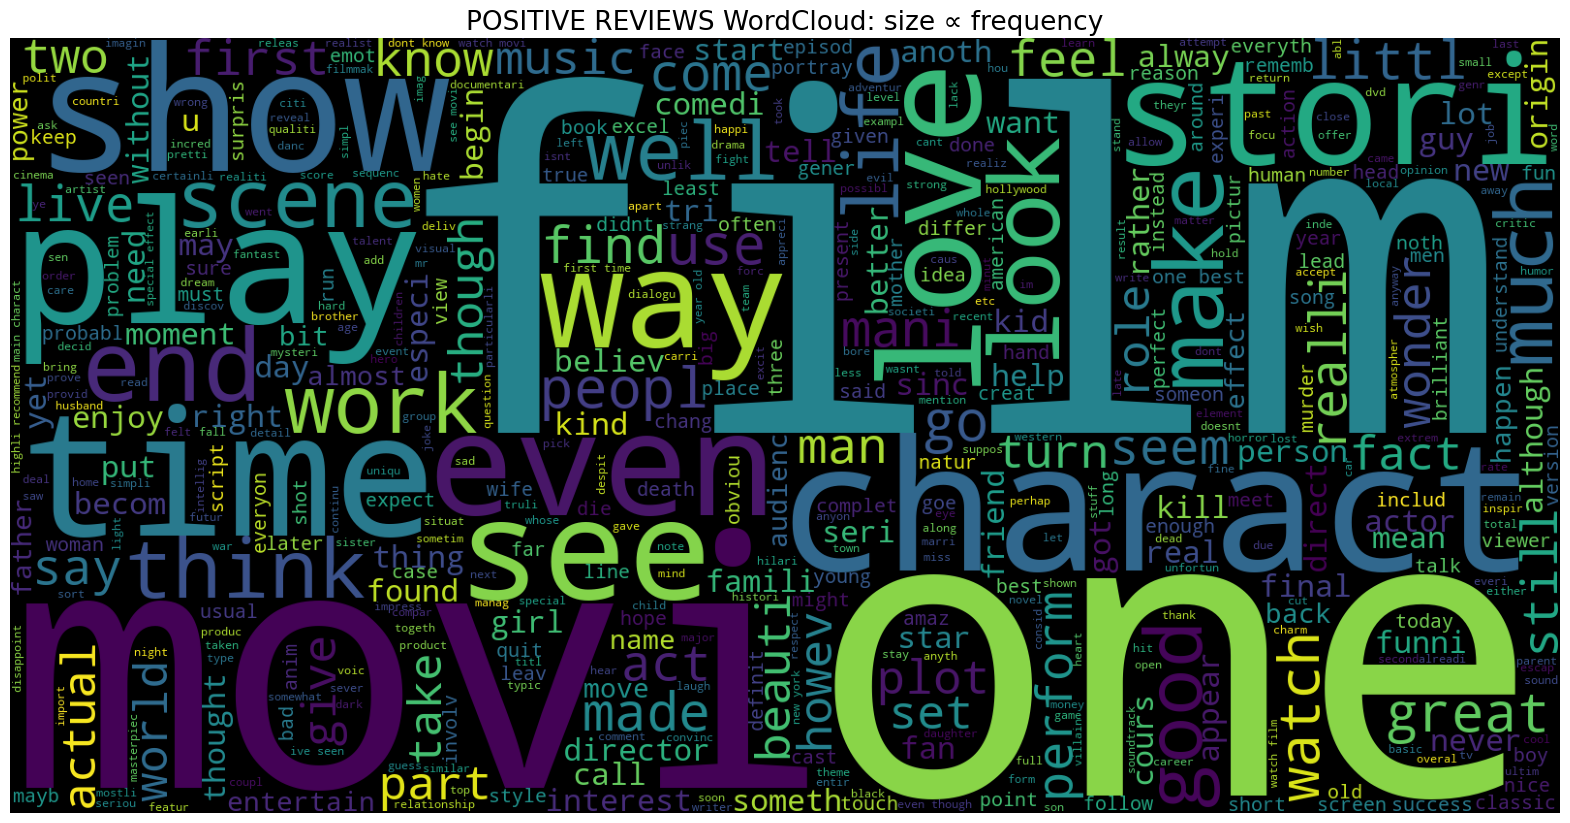

In [31]:
# Concatenates all reviews into a single string separated by spaces
text = ' '.join(review for review in pos_reviews['review'])
# text[:2000]

# facecolor specifies the background color of the figure
plt.figure(figsize=(20,15), facecolor='None')

from wordcloud import WordCloud
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

# Matplotlib renders the word cloud as an image on the current figure
# interpolation='bilinear' ensures that the image is displayed smoothly, preserving the visual quality of the word cloud
plt.imshow(wordcloud)

plt.axis('off')
plt.title('POSITIVE REVIEWS WordCloud: size ∝ frequency', fontsize=19)

In [32]:
# Counter is a specialized dictionary subclass that helps in counting hashable objects(has a hash value that never changes during its lifetime)
from collections import Counter
count = Counter()

for text in pos_reviews['review']:
    for word in text.split():
        count[word] += 1

count.most_common(15)

[('film', 49002),
 ('movi', 43097),
 ('one', 26950),
 ('like', 19883),
 ('time', 15462),
 ('see', 14684),
 ('good', 14563),
 ('stori', 13643),
 ('charact', 13629),
 ('make', 13167),
 ('great', 12794),
 ('get', 12578),
 ('watch', 12493),
 ('love', 12064),
 ('well', 11301)]

In [33]:
pos_words = pd.DataFrame(count.most_common(15), columns=['word', 'count'])
pos_words

,word,count
0,film,49002
1,movi,43097
2,one,26950
3,like,19883
4,time,15462
5,see,14684
6,good,14563
7,stori,13643
8,charact,13629
9,make,13167


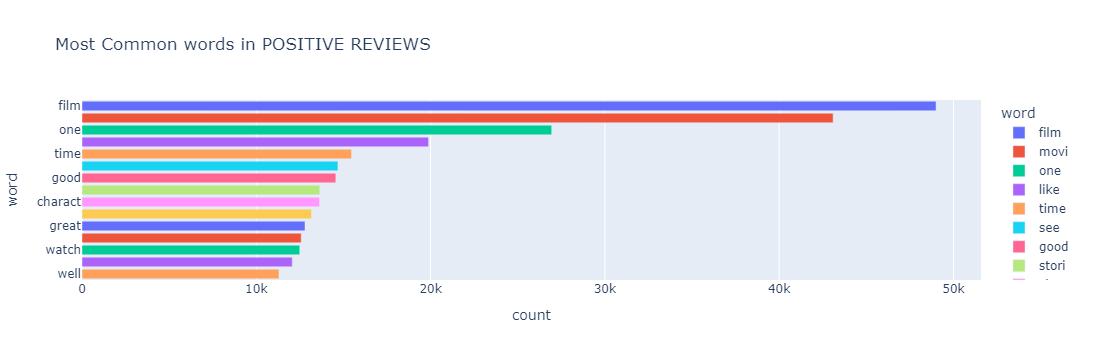

In [44]:
import plotly.express as px
px.bar(pos_words, x='count', y='word', title='Most Common words in POSITIVE REVIEWS', color='word')

## NEGATIVE

In [46]:
neg_reviews = Reviews[Reviews.sentiment == 0]
neg_reviews.head()

,review,sentiment,Word Count
3,basic there famili littl boy jake think there ...,0,67
7,show amaz fresh innov idea 70 first air first ...,0,83
8,encourag posit comment film look forward watch...,0,64
10,phil alien one quirki film humour base around ...,0,51
11,saw movi 12 came recal scariest scene big bird...,0,84


Text(0.5, 1.0, 'NEGATIVE REVIEWS WordCloud: size ∝ frequency')

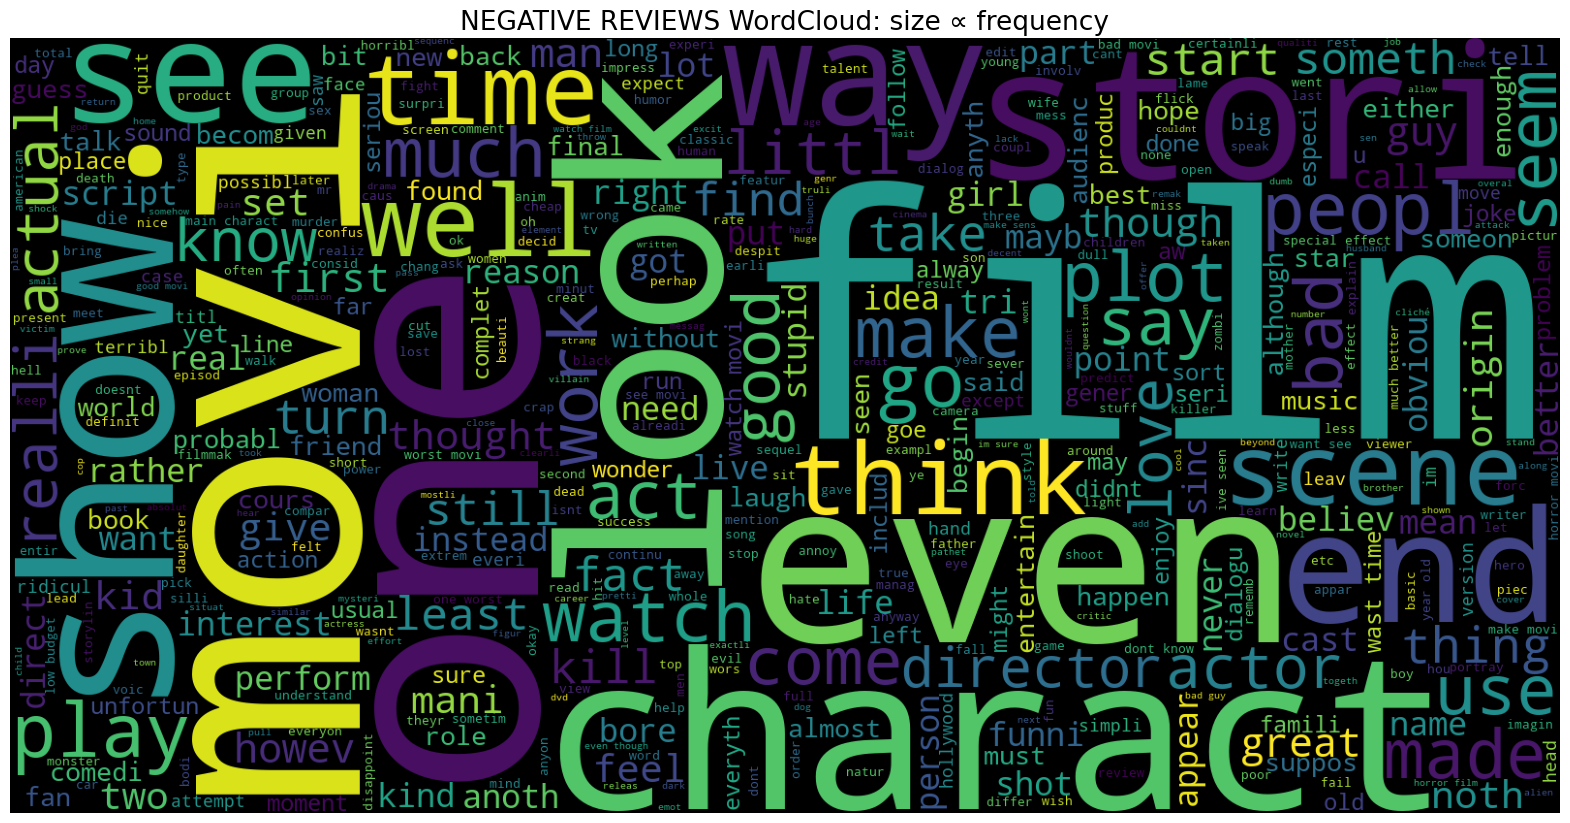

In [48]:
text = ' '.join(review for review in neg_reviews['review'])

plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('NEGATIVE REVIEWS WordCloud: size ∝ frequency', fontsize=19)

In [49]:
from collections import Counter
count = Counter()

for text in neg_reviews['review']:
    for word in text.split():
        count[word] += 1

count.most_common(15)

[('movi', 55845),
 ('film', 43059),
 ('one', 25702),
 ('like', 23939),
 ('make', 15403),
 ('get', 15139),
 ('even', 15096),
 ('watch', 14574),
 ('time', 14336),
 ('good', 14336),
 ('bad', 14128),
 ('charact', 13941),
 ('would', 13633),
 ('see', 12887),
 ('realli', 12221)]

In [50]:
neg_words = pd.DataFrame(count.most_common(15), columns=['word', 'count'])

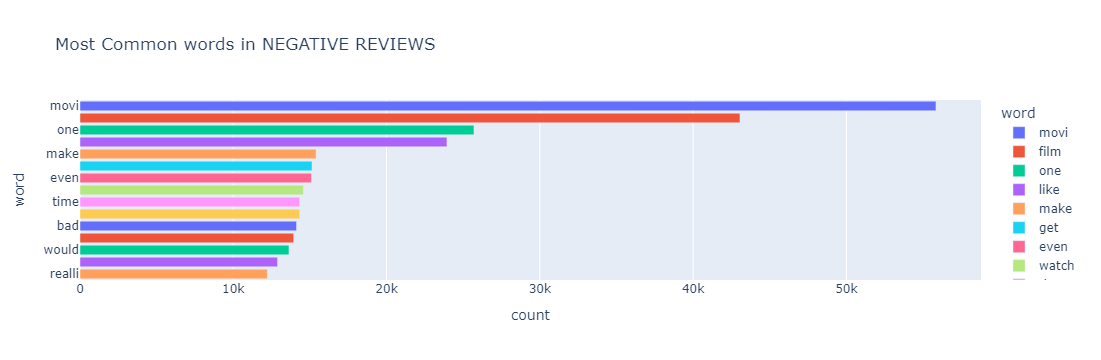

In [52]:
px.bar(neg_words, x='count', y='word', title='Most Common words in NEGATIVE REVIEWS', color='word')

# DATA PREPARATION

## Feature-Target Splitting

In [58]:
# Use df.col for direct and concise access to a known column name
# Use df['col'] for flexibility in accessing columns with special characters or when using variables for dynamic column selection

X = Reviews.review
Y = Reviews.sentiment

## Vectorization

Vectorization is the process of converting textual data into numerical vectors and is a process that is usually applied once the text is cleaned.  
It can help improve the execution speed and reduce the training time of your code.

### TF-IDF (Term Frequency–Inverse Document Frequency)
It is a statistical measure that tells how relevant a word is to a document. It combines two metrics — TF & IDF — to produce a relevance score.  
This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

#### TF
It is the frequency of a word in a document. It is calculated by dividing the occurrence of a word inside a document by the total number of words in that document.

#### IDF 
It is a measure of how much information a word provides. Words like “the,” for example, occur very frequently but provide little context or value to a sentence.  
It is calculated by taking the inverse log of document frequency, that is the proportion of documents that contain a particular word.  
IDF is a way of reducing the weight of terms that appear frequently within a corpus (collection of documents).

TF-IDF scores range from 0 to 1. A score closer to 1 is higher the importance of a word to a document.  
Unlike a bag of words, TF-IDF not only works upon frequency but also retrieves their importance towards the document.

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

# fit_transform() method of TfidfVectorizer learns the vocabulary from the text data (fit) and transforms the data into a sparse matrix (transform).
X = vect.fit_transform(Reviews.review)

In [66]:
print("Shape of X:", X.shape)
print("Type of X:", type(X))

Shape of X: (50000, 181877)
Type of X: <class 'scipy.sparse._csr.csr_matrix'>


## Train-Test Split

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=42)

In [70]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (35000, 181877)
Size of y_train:  (35000,)
Size of x_test:  (15000, 181877)
Size of y_test:  (15000,)


# MODEL TRAINING & EVALUATION

## `LogisticRegression`

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [87]:
from sklearn.metrics import accuracy_score
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print('Test Accuracy: {:.2f}%'.format(logreg_acc*100))

Test Accuracy: 88.95%


In [89]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, logreg_pred))

[[6509  902]
 [ 755 6834]]


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7411
           1       0.88      0.90      0.89      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



## `MultinomialNB`

In [81]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [86]:
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print('Test Accuracy: {:.2f}%'.format(mnb_acc*100))

Test Accuracy: 85.83%


In [95]:
print(confusion_matrix(y_test, mnb_pred))

[[6507  904]
 [1222 6367]]


In [96]:
print(classification_report(y_test, mnb_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      7411
           1       0.88      0.84      0.86      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



## `LinearSVC`

In [111]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(x_train, y_train)

LinearSVC()

In [112]:
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print('Test Accuracy: {:.2f}%'.format(svc_acc*100))

Test Accuracy: 89.27%


In [113]:
print(confusion_matrix(y_test, svc_pred))

[[6547  864]
 [ 745 6844]]


In [114]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7411
           1       0.89      0.90      0.89      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



## HYPERPARAMETER TUNING on selected model

In [115]:
from sklearn.model_selection import GridSearchCV

# C: Regularization parameter controlling the trade-off between achieving a low training error and a low testing error
# loss: Specifies the loss function to be used: 'hinge' for standard SVM loss, 'squared_hinge' for squared hinge loss
param_grid = {'C':[0.1,1,10,100], 'loss':['hinge','squared_hinge']}

# svc: The classifier (e.g., Support Vector Machine) that we want to optimize using grid search.
# param_grid: A dictionary specifying the hyperparameters and their possible values to explore during grid search.
# refit=True: Indicates that the best hyperparameters found will be used to refit the model on the entire dataset.
# verbose=3: Controls the verbosity of the o/p during grid search. A higher value (e.g., 3) provides more detailed info about the search progress.
grid = GridSearchCV(svc, param_grid, refit=True, verbose=3)

# Initiating the grid search process 
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.877 total time=   0.1s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.873 total time=   0.1s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.881 total time=   0.1s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.869 total time=   0.1s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.1s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.893 total time=   0.2s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.885 total time=   0.2s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.893 total time=   0.1s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.885 total time=   0.1s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.886 total time=   0.1s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.893 total time=   0.5s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [118]:
print('Best cross validation score: {:.2f}%'.format(grid.best_score_))
print('Best parameters: ', grid.best_params_)

Best cross validation score: 0.89%
Best parameters:  {'C': 1, 'loss': 'hinge'}


## Optimized Model Training and Testing

In [119]:
svc = LinearSVC(C=1, loss='hinge')
svc.fit(x_train, y_train)

LinearSVC(C=1, loss='hinge')

In [120]:
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print('Test Accuracy: {:.2f}%'.format(svc_acc*100))

Test Accuracy: 89.56%


In [121]:
print(confusion_matrix(y_test, svc_pred))

[[6561  850]
 [ 716 6873]]


In [122]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7411
           1       0.89      0.91      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000

